## Tarea 8 Modelos Estadísticos ##

### Problema 3 ###

In [4]:
##############
# PROBLEMA 3 #
##############
from tabulate import tabulate
from texttable import Texttable

import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

dataP8=pd.read_csv('DatosP3T8.csv')
# Variable respuesta
Y=np.column_stack([dataP8['leucemia'],dataP8['otros']])
# Variable explicativa (variable Dummy)
X=np.array([[0,0,0],[1,0,0],[0,1,0],[0,0,1],[0,0,2],[0,2,2]])
X=sm.add_constant(X,prepend=True)
# Ajuste modelo binomial-liga 
binomial_model_logit=sm.GLM(Y,X,family=sm.families.Binomial())
result_logit=binomial_model_logit.fit()

print(result_logit.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}  &   ['y1', 'y2']   & \textbf{  No. Observations:  } &        6    \\
\textbf{Model:}          &       GLM        & \textbf{  Df Residuals:      } &        2    \\
\textbf{Model Family:}   &     Binomial     & \textbf{  Df Model:          } &        3    \\
\textbf{Link Function:}  &      logit       & \textbf{  Scale:             } &    1.0000   \\
\textbf{Method:}         &       IRLS       & \textbf{  Log-Likelihood:    } &   -11.654   \\
\textbf{Date:}           & Fri, 28 May 2021 & \textbf{  Deviance:          } &    1.6421   \\
\textbf{Time:}           &     22:24:27     & \textbf{  Pearson chi2:      } &     1.58    \\
\textbf{No. Iterations:} &        6         & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const} & 

Utilizaremos las ligas logit, probit y c-log-log que se sugieren en Dobson.

In [6]:
# Ajuste modelo binomial-liga probit
binomial_model_probit=sm.GLM(Y,X,family=sm.families.Binomial(sm.families.links.probit()))
result_probit=binomial_model_probit.fit()
print(result_probit.summary().as_latex())


\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}  &   ['y1', 'y2']   & \textbf{  No. Observations:  } &        6    \\
\textbf{Model:}          &       GLM        & \textbf{  Df Residuals:      } &        2    \\
\textbf{Model Family:}   &     Binomial     & \textbf{  Df Model:          } &        3    \\
\textbf{Link Function:}  &      probit      & \textbf{  Scale:             } &    1.0000   \\
\textbf{Method:}         &       IRLS       & \textbf{  Log-Likelihood:    } &   -12.064   \\
\textbf{Date:}           & Fri, 28 May 2021 & \textbf{  Deviance:          } &    2.4625   \\
\textbf{Time:}           &     22:27:59     & \textbf{  Pearson chi2:      } &     2.36    \\
\textbf{No. Iterations:} &        7         & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const} & 

In [7]:
# Ajuste modelo binomial-liga cloglog
binomial_model_cloglog=sm.GLM(Y,X,family=sm.families.Binomial(sm.families.links.cloglog()))
result_cloglog=binomial_model_cloglog.fit()
print(result_cloglog.summary().as_latex())


\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}  &   ['y1', 'y2']   & \textbf{  No. Observations:  } &        6    \\
\textbf{Model:}          &       GLM        & \textbf{  Df Residuals:      } &        2    \\
\textbf{Model Family:}   &     Binomial     & \textbf{  Df Model:          } &        3    \\
\textbf{Link Function:}  &     cloglog      & \textbf{  Scale:             } &    1.0000   \\
\textbf{Method:}         &       IRLS       & \textbf{  Log-Likelihood:    } &   -11.529   \\
\textbf{Date:}           & Fri, 28 May 2021 & \textbf{  Deviance:          } &    1.3923   \\
\textbf{Time:}           &     22:29:25     & \textbf{  Pearson chi2:      } &     1.34    \\
\textbf{No. Iterations:} &        7         & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const} & 

El que tuvo peor desempeño es el modelo con la liga cloglog, las ligas probit y logit tuvieron comportamientos similares. Usaremos la liga logit por se la liga canónica. 

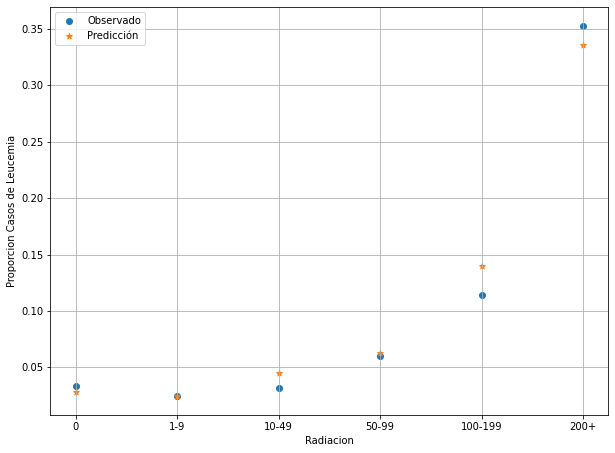

In [8]:
# Grafica de la proporcion de casos de leucimia respecto a los niveles de radiacion
Y_plot=Y[:,0]/Y.sum(1)
Y_predict=result_cloglog.mu
X_plot=dataP8['radiacion']
plt.figure(figsize=(10,7.5))
plt.scatter(X_plot,Y_plot,label='Observado')
plt.scatter(X_plot,Y_predict,label='Predicción',marker='*')
plt.xlabel('Radiacion')
plt.ylabel('Proporcion Casos de Leucemia')
plt.legend()
plt.grid(True)
plt.show()

### Problema 4 ###

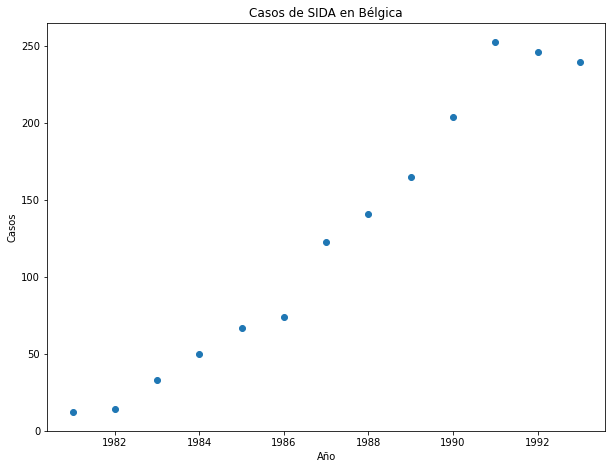

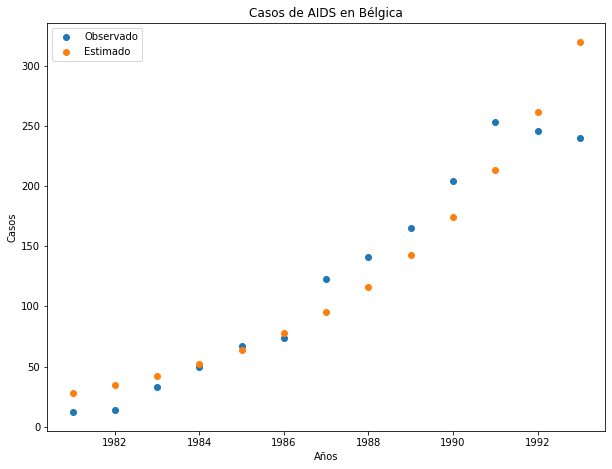

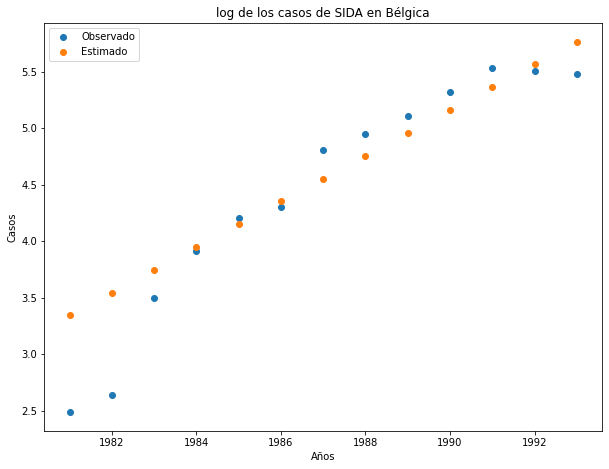

In [9]:
##############
# PROBLEMA 4 #
##############
from scipy.stats import norm, poisson
cases = [12,14,33,50,67,74,123,141,165,204,253,246,240]
x = np.array(range(13))
years = x+1981

# significance level
alpha = 0.05

plt.figure(figsize=(10,7.5))
plt.plot(years, cases, 'o')
plt.xlabel('Año')
plt.ylabel('Casos')
plt.title("Casos de SIDA en Bélgica")

n = len(cases)
X = np.vstack([np.ones(n), x]).T

# Poisson regression by hand
b = [3,0.2] # initial values

tolm   = 1e-6       # tolerance (minimum norm of the difference of the betas)
iterm  = 100        # maximum number of iterations
tolera = 1          # initialize tolera
itera  = 0          # initialize ittera
histo  = b          # initialize beta upgrade

while((tolera > tolm) and (itera < iterm)):
  lam    = np.exp(X @ b)
  D      = np.diag(lam)
  var_b  = np.linalg.inv(X.T @ D @ X)
  delta  = var_b @ X.T @ (cases-lam)
  b      = b+delta
  tolera = np.sqrt(sum(delta**2))
  histo  = np.vstack([histo, b])
  itera  = itera+1

histo

# Let's get the significance of the estimators
se_b = np.sqrt(np.diag(var_b))
z_score = b/se_b
p_value = 1-norm.cdf(np.abs(z_score))

z_score
p_value

plt.figure(figsize=(10,7.5))
plt.plot(years, cases, 'o', label='Observado')
plt.plot(years, lam, 'o', label='Estimado')
plt.xlabel('Años')
plt.ylabel('Casos')
plt.title("Casos de AIDS en Bélgica")
plt.legend(loc='best')

# Let's plot using the log(cases)
plt.figure(figsize=(10,7.5))
plt.plot(years, np.log(cases), 'o', label='Observado')
plt.plot(years, X @ b, 'o', label='Estimado')
plt.xlabel('Años')
plt.ylabel('Casos')
plt.title("log de los casos de SIDA en Bélgica")
plt.legend(loc='best')



El modelo anterior parece falto de estructura, en ayudantía vimos que la forma de arreglarlo era considerando un predictor lineal de la forma 
\begin{equation*}
\eta_i=\beta_0+\beta_1 x_i+\beta_2 x_i^2
\end{equation*}

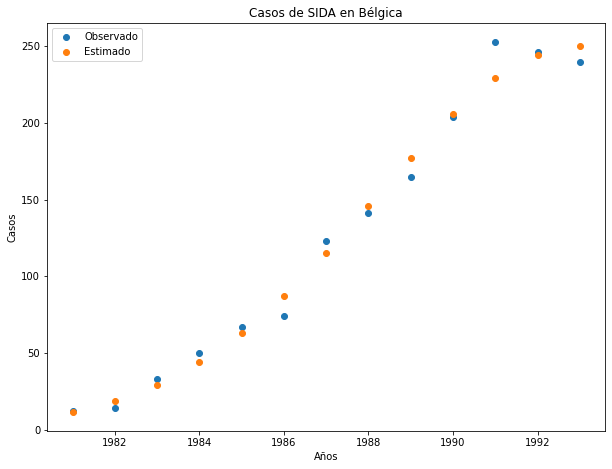

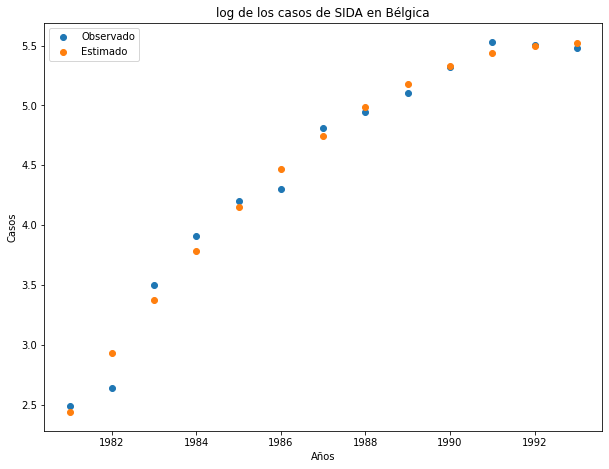

In [10]:
# It looks like there is a lack of structre, lets consider a quadratic fit
X = np.vstack([np.ones(n), x, x**2]).T

# Poisson regression by hand
b = [3,0.2,0.2] # initial values

tolm   = 1e-6       # tolerance (minimum norm of the difference of the betas)
iterm  = 100        # maximum number of iterations
tolera = 1          # initialize tolera
itera  = 0          # initialize ittera
histo  = b          # initialize beta upgrade

while((tolera > tolm) and (itera < iterm)):
  lam    = np.exp(X @ b)
  D      = np.diag(lam)
  var_b  = np.linalg.inv(X.T @ D @ X)
  delta  = var_b @ X.T @ (cases-lam)
  b      = b+delta
  tolera = np.sqrt(sum(delta**2))
  histo  = np.vstack([histo, b])
  itera  = itera+1

# Let's get the significance of the estimators
se_b = np.sqrt(np.diag(var_b))
z_score = b/se_b
p_value = 1-norm.cdf(np.abs(z_score))

p_value

plt.figure(figsize=(10,7.5))
plt.plot(years, cases, 'o', label='Observado')
plt.plot(years, lam, 'o', label='Estimado')
plt.xlabel('Años')
plt.ylabel('Casos')
plt.title("Casos de SIDA en Bélgica")
plt.legend(loc='best')

# Let's plot using the log(cases)
plt.figure(figsize=(10,7.5))
plt.plot(years, np.log(cases), 'o', label='Observado')
plt.plot(years, X @ b, 'o', label='Estimado')
plt.xlabel('Años')
plt.ylabel('Casos')
plt.title("log de los casos de SIDA en Bélgica")
plt.legend(loc='best')




Podemos generar intervalos de confianza notando que 
\begin{equation*}
\text{Var}[\hat{\beta}]\approx (X^TDX)^{-1}
\end{equation*}
con $D=\text{diag}(\lambda_i)$

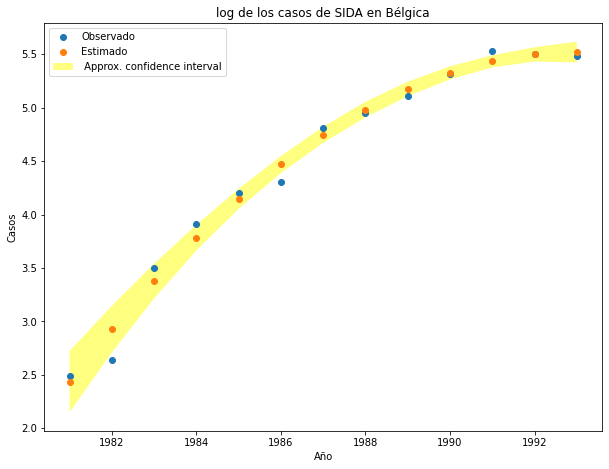

In [11]:
# Let's add confidence and prediction intervals
upp_conf = X @ b + norm.ppf(1-alpha/2)*np.sqrt(np.diag(X @ var_b @ X.T))
low_conf = X @ b - norm.ppf(1-alpha/2)*np.sqrt(np.diag(X @ var_b @ X.T))

# Let's plot using the log(cases)
plt.figure(figsize=(10,7.5))
plt.fill_between(years, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label=' Approx. confidence interval')
plt.plot(years, np.log(cases), 'o', label='Observado')
plt.plot(years, X @ b, 'o', label='Estimado')
plt.xlabel('Año')
plt.ylabel('Casos')
plt.title("log de los casos de SIDA en Bélgica")
plt.legend(loc='upper left')

Obtenemos intervalos de predicción considerando $Y_i|X_i\sim\text{Pois}(\lambda_i)$, obtendremos cuantiles con un nivel de significancia $\alpha=0.05$

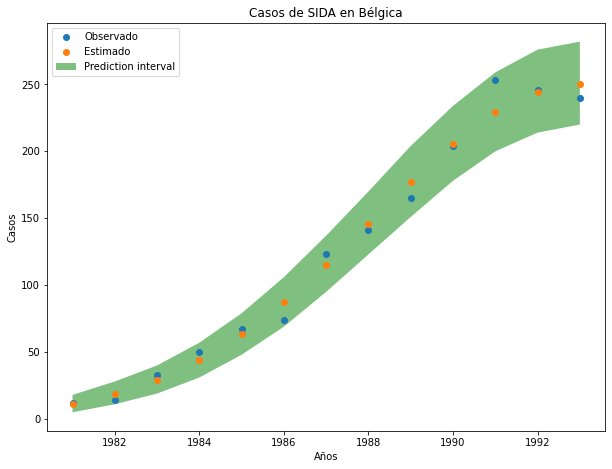

In [12]:
upp_pred = poisson.ppf(1-alpha/2, lam)
low_pred = poisson.ppf(alpha/2, lam)

plt.figure(figsize=(10,7.5))
plt.fill_between(years, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Prediction interval')
plt.plot(years, cases, 'o', label='Observado')
plt.plot(years, lam, 'o', label='Estimado')
plt.xlabel('Años')
plt.ylabel('Casos')
plt.title("Casos de SIDA en Bélgica")
plt.legend(loc='upper left')



Observamos que los intervalos de confianza están en escala logarítmica respecto a los casos de AIDS mientras que los de predicción no, con ayuda del método $\delta$ podemos graficar ambos intervalos al mismo tiempo

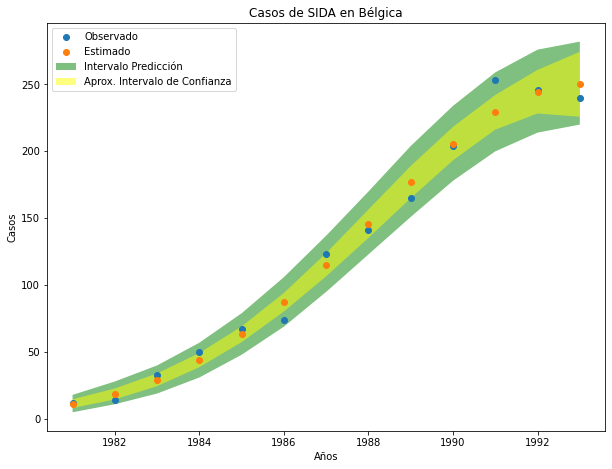

In [13]:
upp_conf_y_scale = lam + norm.ppf(1-alpha/2)*np.sqrt(np.exp(2*X @ b) * np.diag(X @ var_b @ X.T))
low_conf_y_scale = lam - norm.ppf(1-alpha/2)*np.sqrt(np.exp(2*X @ b) * np.diag(X @ var_b @ X.T))

# We can add the confidence interval, with the warning due to Jensen's inequality
plt.figure(figsize=(10,7.5))
plt.fill_between(years, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Intervalo Predicción')
plt.fill_between(years, low_conf_y_scale, upp_conf_y_scale, facecolor='yellow', alpha=0.5, label='Aprox. Intervalo de Confianza')
plt.plot(years, cases, 'o', label='Observado')
plt.plot(years, lam, 'o', label='Estimado')
plt.xlabel('Años')
plt.ylabel('Casos')
plt.title("Casos de SIDA en Bélgica")
plt.legend(loc='upper left')

### Problema 5 ###

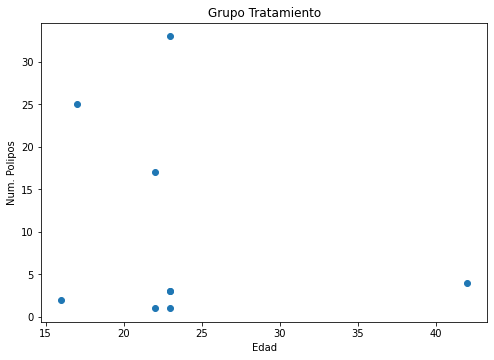

In [14]:
##############
# PROBLEMA 5 #
##############

# INCISO A
trat=pd.read_csv('P5Trat.csv')
plac=pd.read_csv('P5Plac.csv')

# Grupo Tratamiento
plt.figure(figsize=(8,5.5))
plt.scatter(trat['Edad'],trat['Numero'])
plt.xlabel('Edad')
plt.ylabel('Num. Polipos')
plt.title('Grupo Tratamiento')
plt.show()

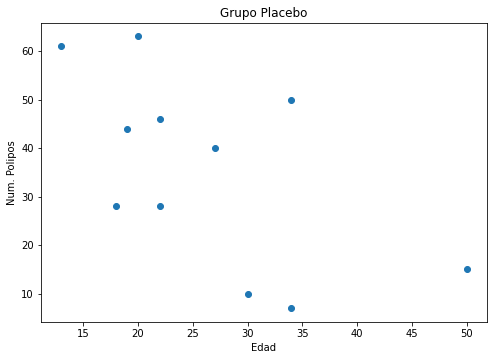

In [15]:
# Grupo Placebo
plt.figure(figsize=(8,5.5))
plt.scatter(plac['Edad'],plac['Numero'])
plt.xlabel('Edad')
plt.ylabel('Num. Polipos')
plt.title('Grupo Placebo')
plt.show()

In [16]:
# Ajuste de Poisson GLM (Tratamiento)
edad_trat=trat['Edad'].to_numpy()
num_trat=trat['Numero'].to_numpy()
X_trat=sm.add_constant(edad_trat)
poisson_model_trat = sm.GLM(num_trat, X_trat, family=sm.families.Poisson())
poisson_results_trat = poisson_model_trat.fit()
print(poisson_results_trat.summary().as_latex())


\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}  &        y         & \textbf{  No. Observations:  } &        9    \\
\textbf{Model:}          &       GLM        & \textbf{  Df Residuals:      } &        7    \\
\textbf{Model Family:}   &     Poisson      & \textbf{  Df Model:          } &        1    \\
\textbf{Link Function:}  &       log        & \textbf{  Scale:             } &    1.0000   \\
\textbf{Method:}         &       IRLS       & \textbf{  Log-Likelihood:    } &   -66.240   \\
\textbf{Date:}           & Fri, 28 May 2021 & \textbf{  Deviance:          } &    101.53   \\
\textbf{Time:}           &     23:38:37     & \textbf{  Pearson chi2:      } &     108.    \\
\textbf{No. Iterations:} &        5         & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const} & 

In [17]:
# Ajuste de Poisson GLM (Placebo)
edad_plac=plac['Edad'].to_numpy()
num_plac=plac['Numero'].to_numpy()
X_plac=sm.add_constant(edad_plac)
poisson_model_plac = sm.GLM(num_plac, X_plac, family=sm.families.Poisson())
poisson_results_plac = poisson_model_plac.fit()
print(poisson_results_plac.summary().as_latex())



\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}  &        y         & \textbf{  No. Observations:  } &       11    \\
\textbf{Model:}          &       GLM        & \textbf{  Df Residuals:      } &        9    \\
\textbf{Model Family:}   &     Poisson      & \textbf{  Df Model:          } &        1    \\
\textbf{Link Function:}  &       log        & \textbf{  Scale:             } &    1.0000   \\
\textbf{Method:}         &       IRLS       & \textbf{  Log-Likelihood:    } &   -67.673   \\
\textbf{Date:}           & Fri, 28 May 2021 & \textbf{  Deviance:          } &    77.958   \\
\textbf{Time:}           &     23:39:15     & \textbf{  Pearson chi2:      } &     74.3    \\
\textbf{No. Iterations:} &        4         & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const} & 

Graficamos la varianza (eje Y) contra la media estimada (eje X) en cada caso

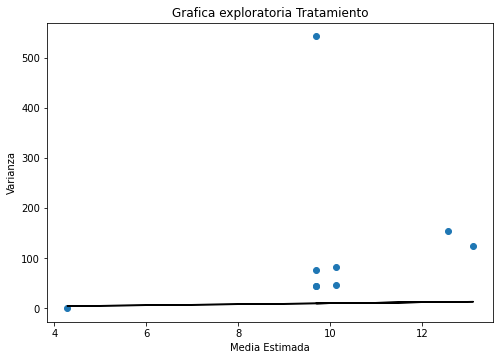

In [18]:
mu_trat=poisson_results_trat.mu
mu_plac=poisson_results_plac.mu
var_trat=(num_trat-mu_trat)**2
var_plac=(num_plac-mu_plac)**2

# Varianza vs Media Tratamiento
plt.figure(figsize=(8,5.5))
plt.scatter(mu_trat,var_trat)
plt.plot(mu_trat,mu_trat,color='black')
plt.xlabel('Media Estimada')
plt.ylabel('Varianza')
plt.title('Grafica exploratoria Tratamiento')
plt.show()

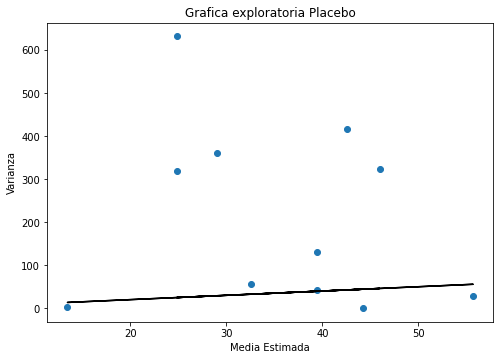

In [20]:
# Varianza vs Media Tratamiento
plt.figure(figsize=(8,5.5))
plt.scatter(mu_plac,var_plac)
plt.plot(mu_plac,mu_plac,color='black')
plt.xlabel('Media Estimada')
plt.ylabel('Varianza')
plt.title('Grafica exploratoria Placebo')
plt.show()